In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop



In [2]:
# Create a label encoder
label_encoder = LabelEncoder()


In [3]:
# Load your audio dataset (X_train, y_train) where X_train contains audio features and y_train contains gender labels (0 for female, 1 for male)
df = pd.read_csv(r"C:\Users\gowda\OneDrive\Desktop\voice gender detectio\voice.csv")

In [4]:
X_train = df.drop(columns=["label"])  # Adjust column name
y_train = df["label"]  

In [5]:
# Encode gender labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [6]:
# Split the data into train and validation sets
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(
    X_train, y_train_encoded, test_size=0.2, random_state=42
)

In [7]:
# Assuming Audio is a numpy array or a list of audio data
Audio = np.random.rand(100, 10)  
labels_f = np.random.randint(0, 2, 100) 

In [8]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [9]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten= Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=['accuracy','accuracy'])
    return model

In [10]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


c:\Users\gowda\anaconda3\envs\age_gende_detection\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Define your model architecture
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))  # Adjust input_shape as needed
model.add(Dense(1, activation='sigmoid'))


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(Audio, labels_f, test_size=0.25, random_state=42)

In [14]:
fle_s = 'voice_gender_detectio.keras'
checkpoint = ModelCheckpoint(fle_s, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
early_stop = EarlyStopping(patience=75, monitor='val_loss', restore_best_weights=True)
callback_list = [checkpoint, early_stop]


In [15]:
input_shape = X_train.shape[1]

In [16]:
# Create the model
model = Sequential()
model.add(Dense(64, input_shape=(input_shape,), activation='relu'))  # Adjust input_shape as needed
model.add(Dense(1, activation='sigmoid'))


In [17]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [18]:
# Fit the model
History = model.fit(X_train, Y_train, batch_size=64, validation_data=(X_test, Y_test), epochs=250, callbacks=[checkpoint, early_stop])

Epoch 1/250
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 701ms/step - accuracy: 0.5781 - loss: 0.6839
Epoch 1: val_loss improved from inf to 0.76698, saving model to voice_gender_detectio.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.5660 - loss: 0.6869 - val_accuracy: 0.3200 - val_loss: 0.7670
Epoch 2/250
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5469 - loss: 0.6876
Epoch 2: val_loss improved from 0.76698 to 0.76222, saving model to voice_gender_detectio.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5467 - loss: 0.6870 - val_accuracy: 0.3200 - val_loss: 0.7622
Epoch 3/250
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5625 - loss: 0.6798
Epoch 3: val_loss did not improve from 0.76222
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5519 - loss: 0.6838 - val_accuracy: 0.3200 - val_loss: 0.7625
Epoch 4/250
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5156 - loss: 0.6959
Epoch 4: val_loss did not improve from 0.76222
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 

In [19]:
# Check the shapes of your data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)



X_train shape: (75, 10)
X_test shape: (25, 10)
Y_train shape: (75,)
Y_test shape: (25,)


In [20]:
# Define callbacks
checkpoint = ModelCheckpoint('voice_detection.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [21]:
# Print the data types to confirm
print("X_train dtype:", X_train.dtype)
print("y_train dtype:", y_train.dtype)

X_train dtype: float64
y_train dtype: object


In [22]:
model.evaluate(X_test,Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3200 - loss: 0.7622


[0.7622239589691162, 0.3199999928474426]

In [23]:
pred=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [24]:
pred[1]


array([0.53096914], dtype=float32)

In [25]:
from matplotlib import pyplot as plt

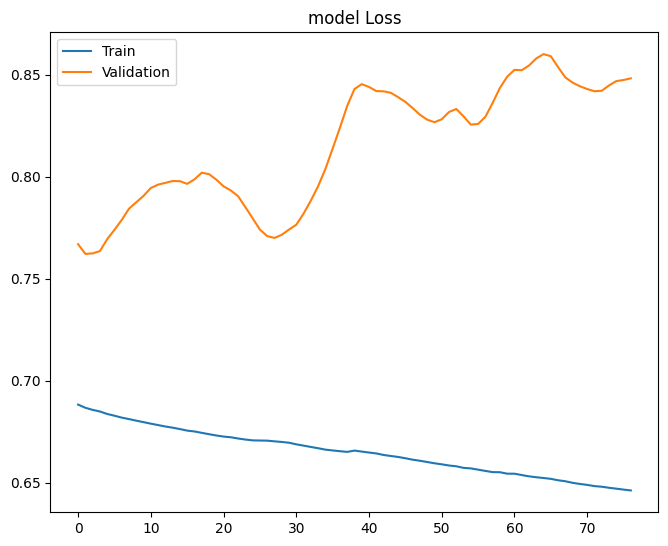

In [26]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

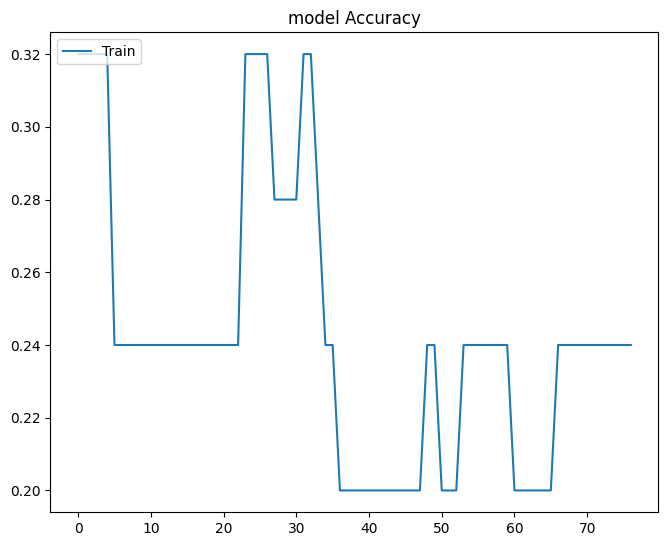

In [27]:

plt.plot(History.history['val_accuracy'])
plt.title('model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

In [28]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [30]:
model.save('Voice detection.keras')